# Linear Regression Implementation

In [94]:
import pandas as pd
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df=load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [96]:
dataset=pd.DataFrame(df.data)

In [97]:
dataset.columns=df.feature_names
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [98]:
#dependent and independent features
x=dataset
y=df.target

In [99]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [100]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [101]:
x_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [102]:
##standardising the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
#we can also reverse the transformation using scaler.inverse_transform(x_train)

In [103]:
x_train

array([[ 1.49836523,  1.06136988,  0.21990201, ...,  0.71103773,
         0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, ...,  1.4842858 ,
        -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711, ..., -0.06221033,
         0.3312366 , -0.31866022],
       ...,
       [ 0.63475351, -0.94217861, -0.46502808, ..., -0.83545839,
        -0.25375196, -0.06144896],
       [-0.30736838, -0.94217861, -0.53352109, ..., -0.06221033,
        -0.83072436, -0.83308273],
       [-2.03459183, -0.94217861,  0.56236706, ..., -0.83545839,
        -0.13312789, -0.06144896]], shape=(353, 10))

In [104]:
#model training
from sklearn.linear_model import LinearRegression
#cross validation
from sklearn.model_selection import cross_val_score

In [105]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [106]:
mse=cross_val_score(regression,x_train,y_train,cv=10,scoring='neg_mean_squared_error')

In [107]:
np.mean(mse)

np.float64(-3119.5788878352832)

In [108]:
#prediction
regression_pred=regression.predict(x_test)

In [109]:
regression_pred

array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
       123.78965872,  92.1723465 , 258.23238899, 181.33732057,
        90.22411311, 108.63375858,  94.13865744, 168.43486358,
        53.5047888 , 206.63081659, 100.12925869, 130.66657085,
       219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
       207.35050182,  88.48340941,  70.43285917, 188.95914235,
       154.8868162 , 159.36170122, 188.31263363, 180.39094033,
        47.99046561, 108.97453871, 174.77897633,  86.36406656,
       132.95761215, 184.53819483, 173.83220911, 190.35858492,
       124.4156176 , 119.65110656, 147.95168682,  59.05405241,
        71.62331856, 107.68284704, 165.45365458, 155.00975931,
       171.04799096,  61.45761356,  71.66672581, 114.96732206,
        51.57975523, 167.57599528, 152.52291955,  62.95568515,
       103.49741722, 109.20751489, 175.64118426, 154.60296242,
        94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
       187.93203995, 206.49337474, 140.63167076, 105.59

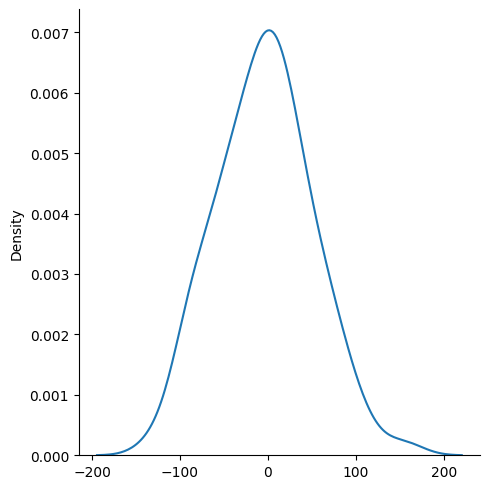

In [110]:
import seaborn as sns
sns.displot(regression_pred-y_test,kind='kde')

In [111]:
from sklearn.metrics import  r2_score
score=r2_score(y_test,regression_pred)
print("R2 Score:", score)

R2 Score: 0.45260276297191937


## Ridge regressor

In [112]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [113]:
ridge_regressor=Ridge()

In [114]:
ridge_regressor

Ridge()

In [115]:
parameters={'alpha':[1,2,3,5,10,20,30,40,50,60,70,80,90,100]}
ridge_regressor_cv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100]},
             scoring='neg_mean_squared_error')

In [116]:
ridge_regressor_cv.best_score_

np.float64(-3112.498488428872)

In [117]:
ridge_regressor_cv.best_params_

{'alpha': 3}

In [118]:
ridge_regressor_cv_pred=ridge_regressor_cv.predict(x_test)

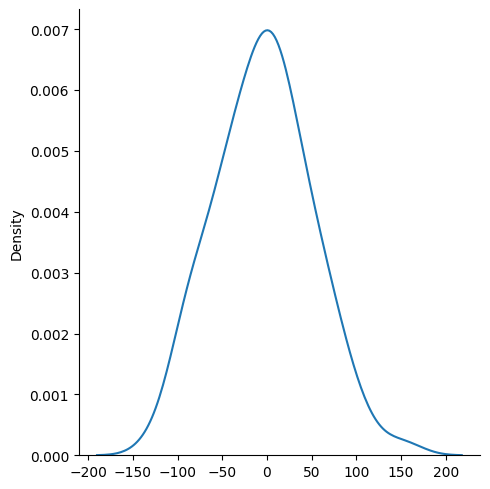

In [119]:
import seaborn as sns
sns.displot(ridge_regressor_cv_pred-y_test,kind='kde')

In [120]:
score=r2_score(y_test,ridge_regressor_cv_pred)
print("R2 Score:", score)

R2 Score: 0.4554700770012753


## Lasso regressor

In [121]:
lasso_regressor=Lasso()

In [122]:
lasso_regressor

Lasso()

In [123]:
parameters={'alpha':[1,2,3,5,10,20,30,40,50,60,70,80,90,100]}
lasso_regressorcv=GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressorcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90, 100]},
             scoring='neg_mean_squared_error')

In [125]:
lasso_regressorcv.best_score_

np.float64(-3123.5787762406335)

In [126]:
lasso_regressorcv.best_params_

{'alpha': 1}

In [128]:
lasso_regressor_pred=lasso_regressorcv.predict(x_test)

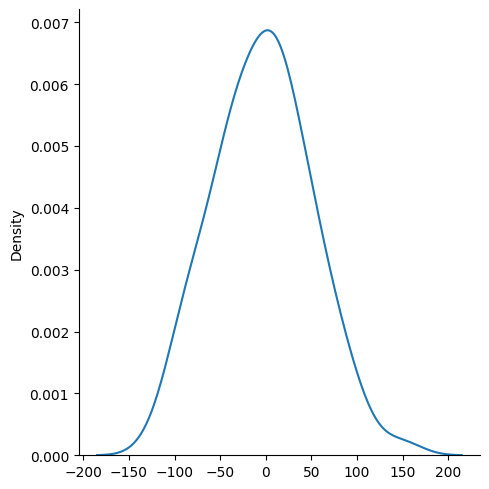

In [129]:
import seaborn as sns
sns.displot(lasso_regressor_pred-y_test,kind='kde')